In [8]:
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense

import numpy as np

Using TensorFlow backend.


In [9]:
df = pd.read_excel('../data/join.xls', index_col=0)
df.head(3)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
ИНДЕКС 1,,,,,,,,,,,,,
0,0,4.0,57.0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,0,4.0,60.0,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,0,4.0,70.0,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0,220.0


In [10]:
df.drop(['Угол нашивки, град', 'Потребление смолы, г/м2'], axis=1, inplace=True)
df = df.dropna()
df.head(3)

,Шаг нашивки,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
ИНДЕКС 1,,,,,,,,,,,
0,4.0,57.0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0
1,4.0,60.0,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0
2,4.0,70.0,1.857143,2030.0,738.736842,49.9,33.000000,284.615385,210.0,70.0,3000.0


In [11]:
y = df['Модуль упругости при растяжении, ГПа']

X = df.iloc[:, 1:]
X = X.astype(float)
X.shape

(1023, 10)

In [12]:
y.shape

(1023,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape

(716, 10)

In [14]:
X_train.head(3)

,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
ИНДЕКС 1,,,,,,,,,,
176,82.723681,2.213130,2107.861060,343.053795,74.386505,23.075890,277.080676,105.477725,71.329574,2667.109248
399,63.561645,3.027069,2095.716754,920.762817,105.778668,20.532135,244.476593,859.432338,72.429467,2844.655510
1000,71.960542,3.109130,2019.939791,855.877168,125.654249,22.788022,323.766318,585.456532,82.525773,2715.953011


In [15]:
y_train.head(3)

ИНДЕКС 1
176     71.329574
399     72.429467
1000    82.525773
Name: Модуль упругости при растяжении, ГПа, dtype: float64

In [57]:
model = Sequential([
    Dense(9, activation='relu', input_dim=10),
    Dense(9, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='softmax'),
])

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae", "acc"])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 9)                 99        
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
716/716 [==============================] - 1s 836us/step - loss: 5217.1371 - mean_absolute_error: 72.1634 - acc: 0.0000e+00
Epoch 2/10
716/716 [==============================] - 0s 54us/step - loss: 5217.1372 - mean_absolute_error: 72.1634 - acc: 0.0000e+00
Epoch 3/10
716/716 [==============================] - 0s 60us/step - loss: 5217.1372 - mean_absolute_error: 72.1634 - acc: 0.0000e+00
Epoch 4/10
716/716 [==============================] - 0s 63us/step - loss: 5217.1373 - mean_absolute_error: 72.1634 - acc: 0.0000e+00
Epoch 5/10
716/716 [==============================] - 0s 63us/step - loss: 5217.1373 - mean_absolute_error: 72.1634 - acc: 0.0000e+00
Epoch 6/10
716/716 [==============================] - 0s 51us/step - loss: 5217.1372 - mean_absolute_error: 72.1634 - acc: 0.0000e+00
Epoch 7/10
716/716 [==============================] - 0s 51us/step - loss: 5217.1372 - mean_absolute_error: 72.1634 - acc: 0.0000e+00
Epoch 8/10
716/716 [==============================] - 0s 50us

In [59]:
model.evaluate(X_test, y_test)

307/307 [==============================] - 0s 387us/step


[5297.123059598941, 72.71386107404379, 0.0]

In [60]:
y_pred = model.predict(X_test)
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

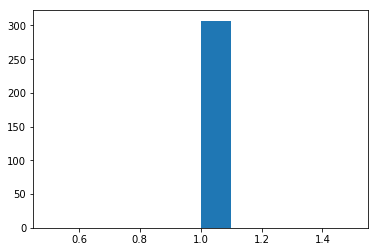

In [61]:
import matplotlib.pyplot as plt
plt.hist(y_pred);


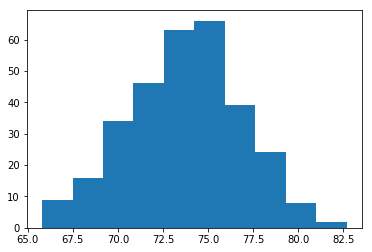

In [62]:
plt.hist(y_test);

In [64]:
model.save("composit_mlp_10")

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 9)                 99        
_________________________________________________________________
dense_22 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_23 (Dense)             (None, 5)                 50        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 6         
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [66]:
composit = np.array(X_test)[0]
composit
composit.shape

(10,)

In [67]:
composit.reshape(1, 10)

array([[7.00000000e+01, 2.56962025e+00, 1.91000000e+03, 8.07000000e+02,
        1.11860000e+02, 2.22678571e+01, 2.84615385e+02, 2.10000000e+02,
        7.00000000e+01, 3.00000000e+03]])

In [68]:
model.predict(composit.reshape(1, 10))

array([[1.]], dtype=float32)

In [69]:
y_pred.reshape(X_test.shape[0])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [72]:
np.array(y_test)

array([70.        , 75.81972222, 74.8167635 , 70.94187684, 74.51911906,
       72.89537358, 75.74331481, 73.76924811, 67.53908354, 71.00180764,
       73.94610764, 73.24146401, 71.88611568, 74.51555999, 69.68730857,
       76.49376778, 76.52268029, 77.25419478, 72.45644746, 73.21928593,
       79.73999927, 68.06237714, 76.8209329 , 74.27354907, 71.70219546,
       74.77954097, 73.72639353, 72.84847516, 76.03055469, 69.36717861,
       70.87090486, 72.01336192, 74.42904997, 68.14131393, 70.27394612,
       69.48977348, 73.78117768, 68.70802805, 75.54776117, 76.39887496,
       75.31229197, 75.4820758 , 75.06930293, 71.0395502 , 72.68002568,
       78.91489672, 75.00478588, 78.        , 73.84047238, 74.07061496,
       72.62286592, 72.81555209, 74.92555487, 76.83606341, 69.09101589,
       75.50958476, 74.71883227, 72.97612409, 70.9732779 , 74.23665959,
       75.15133971, 73.55043309, 75.01040085, 78.20273121, 72.03102502,
       73.42325767, 75.82548416, 72.75995901, 66.26528996, 72.29

In [73]:
X_test.head(1)

,Плотность нашивки,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
ИНДЕКС 1,,,,,,,,,,
6,70.0,2.56962,1910.0,807.0,111.86,22.267857,284.615385,210.0,70.0,3000.0


In [74]:
X_test.columns

Index(['Плотность нашивки', 'Соотношение матрица-наполнитель',
       'Плотность, кг/м3', 'модуль упругости, ГПа',
       'Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2',
       'Температура вспышки, С_2', 'Поверхностная плотность, г/м2',
       'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа'],
      dtype='object')

In [75]:
composit = np.array(X_test)[0]
composit.shape
composit.reshape(1,10)

array([[7.00000000e+01, 2.56962025e+00, 1.91000000e+03, 8.07000000e+02,
        1.11860000e+02, 2.22678571e+01, 2.84615385e+02, 2.10000000e+02,
        7.00000000e+01, 3.00000000e+03]])

In [84]:
composit_pred = model.predict(composit.reshape((1, 10)))[0][0]
composit_pred


1.0

In [77]:
model.save("composit_mlp")